# Streamlined EDA for Student Performance Analysis

**Project Objectives:**
1. **K-means clustering** using 6 behavioral features: studytime, absences, goout, freetime, famsup, schoolsup
2. **Binary classification** for pass/fail prediction

This notebook contains only the essential visualizations that directly support these modeling objectives.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import warnings

warnings.filterwarnings("ignore")

# Set professional styling
sns.set_style("whitegrid")
plt.rcParams.update(
    {
        "figure.figsize": (10, 6),
        "font.size": 11,
        "axes.titlesize": 14,
        "axes.labelsize": 12,
        "axes.grid": True,
        "grid.alpha": 0.3,
        "axes.spines.top": False,
        "axes.spines.right": False,
    }
)

# Load data
df = pd.read_pickle(r"../data/processed/cleaned_dataset.pkl")

# Create numeric version for correlations
df_numeric = df.copy()
for col in df_numeric.columns:
    if df_numeric[col].dtype == "category":
        df_numeric[col] = df_numeric[col].cat.codes
    elif df_numeric[col].dtype == "bool":
        df_numeric[col] = df_numeric[col].astype(int)

print("Data loaded successfully!")
print(f"Dataset shape: {df.shape}")

Data loaded successfully!
Dataset shape: (649, 36)


In [3]:
# 🎨 CONSISTENT STYLE CONFIGURATION
# Set up professional, consistent styling for all plots

# Set seaborn style and palette
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Set matplotlib parameters for consistency
plt.rcParams.update(
    {
        "figure.figsize": (10, 6),  # Default figure size
        "font.size": 11,  # Base font size
        "axes.titlesize": 14,  # Title font size
        "axes.labelsize": 12,  # Axis label font size
        "xtick.labelsize": 10,  # X-tick label size
        "ytick.labelsize": 10,  # Y-tick label size
        "legend.fontsize": 10,  # Legend font size
        "axes.grid": True,  # Enable grid
        "grid.alpha": 0.3,  # Grid transparency
        "lines.linewidth": 2,  # Line width
        "axes.spines.top": False,  # Remove top spine
        "axes.spines.right": False,  # Remove right spine
    }
)

# Color constants for consistent theming
COLORS = {
    "primary": "#3691d2",  # Blue
    "secondary": "#ff7f0e",  # Orange
    "success": "#2ca02c",  # Green
    "danger": "#d62728",  # Red
    "warning": "#ff7f0e",  # Orange
    "threshold": "#d62728",  # Red for pass/fail lines
    "data_leakage": "#ff7f0e",  # Orange for G1/G2 warnings
}

print("✅ Professional styling configured!")

✅ Professional styling configured!


## 📊 Descriptive Statistics

In [4]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,pass_fail,attendance_proxy,grade_average
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,4,0,11,11,1,87.50,7.333333
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,2,9,11,11,1,93.75,10.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,6,12,13,12,1,81.25,12.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,0,14,14,14,1,100.00,14.000000
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,0,11,13,13,1,100.00,12.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,1,2,5,4,10,11,10,1,87.50,10.333333
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,1,1,1,4,15,15,16,1,87.50,15.333333
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,5,6,11,12,9,0,81.25,10.666667
647,MS,M,17,U,LE3,T,3,1,services,services,...,3,4,2,6,10,10,10,1,81.25,10.000000


In [5]:
# Descriptive statistics for numeric variables
df.describe()

,age,failures,absences,G1,G2,G3,pass_fail,attendance_proxy,grade_average
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,0.221880,3.659476,11.399076,11.570108,11.906009,0.845917,88.564137,11.625064
std,1.218138,0.593235,4.640759,2.745265,2.913639,3.230656,0.361307,14.502371,2.833360
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.333333
25%,16.000000,0.000000,0.000000,10.000000,10.000000,10.000000,1.000000,81.250000,10.000000
50%,17.000000,0.000000,2.000000,11.000000,11.000000,12.000000,1.000000,93.750000,11.666667
75%,18.000000,0.000000,6.000000,13.000000,13.000000,14.000000,1.000000,100.000000,13.333333
max,22.000000,3.000000,32.000000,19.000000,19.000000,19.000000,1.000000,100.000000,18.666667


In [6]:
df.describe(include="category")

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health
count,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649
unique,2,2,2,2,2,5,5,5,5,4,3,4,4,5,5,5,5,5,5
top,GP,F,U,GT3,T,2,2,other,other,course,mother,1,2,4,3,3,1,1,5
freq,423,383,452,457,569,186,209,258,367,285,455,366,305,317,251,205,451,247,249


In [7]:
df.describe(include="bool")

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,649,649,649,649,649,649,649,649
unique,2,2,2,2,2,2,2,2
top,False,True,False,False,True,True,True,False
freq,581,398,610,334,521,580,498,410


---
## Target Variable Distribution

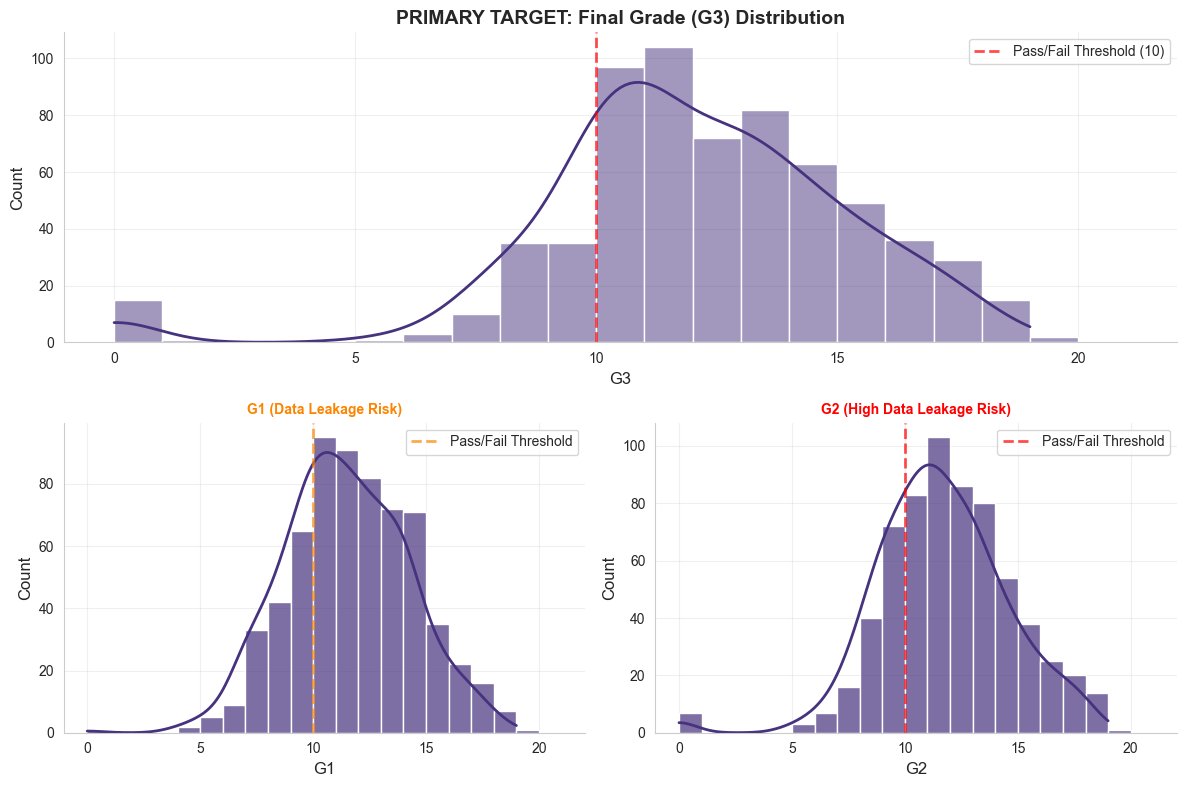

Class Distribution Analysis:
Pass (G3 >= 10): 549 students (84.6%)
Fail (G3 < 10): 100 students (15.4%)

Class imbalance detected - this affects binary classification performance.


In [8]:
# Primary focus: Target variable
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, (1, 2))  # Span two columns for G3
sns.histplot(data=df, x="G3", bins=range(0, 22), kde=True)
# Add pass/fail threshold line with legend
plt.axvline(
    x=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold (10)",
)
plt.title(
    "PRIMARY TARGET: Final Grade (G3) Distribution", fontsize=14, fontweight="bold"
)
plt.legend()

# Context: Grade progression
plt.subplot(2, 2, 3)
sns.histplot(data=df, x="G1", bins=range(0, 22), kde=True, alpha=0.7)
plt.axvline(
    x=10,
    color="#fb8500",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold",
)
plt.title("G1 (Data Leakage Risk)", fontsize=10, color="#fb8500", fontweight="bold")
plt.legend()

plt.subplot(2, 2, 4)
sns.histplot(data=df, x="G2", bins=range(0, 22), kde=True, alpha=0.7)
plt.axvline(
    x=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold",
)
plt.title("G2 (High Data Leakage Risk)", fontsize=10, color="red", fontweight="bold")
plt.legend()

plt.tight_layout()
plt.show()

# Statistical summary
pass_count = df["pass_fail"].sum()
fail_count = (df["pass_fail"] == 0).sum()
pass_rate = pass_count / len(df) * 100

print(f"Class Distribution Analysis:")
print(f"Pass (G3 >= 10): {pass_count} students ({pass_rate:.1f}%)")
print(f"Fail (G3 < 10): {fail_count} students ({100-pass_rate:.1f}%)")
print(f"\nClass imbalance detected - this affects binary classification performance.")

---
## Data Leakage Variables (G1, G2) - Excluded from Models

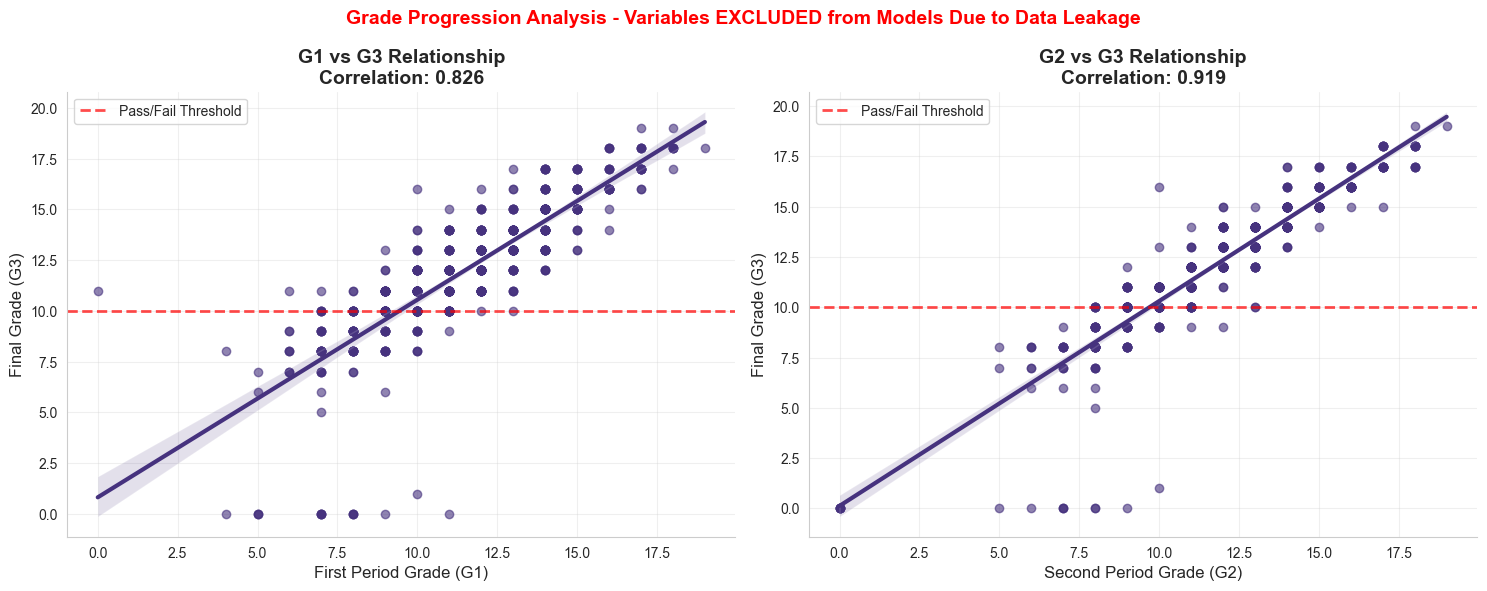

DATA LEAKAGE WARNING:
G1-G3 correlation: 0.826 - Very high correlation creates data leakage
G2-G3 correlation: 0.919 - Extremely high correlation creates severe data leakage

These variables will be EXCLUDED from predictive models to ensure realistic performance estimates.
For early intervention systems, we need to predict G3 from baseline characteristics only.


In [9]:
# Visualization 2 & 3: Grade progression analysis - G1 vs G3 and G2 vs G3
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(
    "Grade Progression Analysis - Variables EXCLUDED from Models Due to Data Leakage",
    fontsize=14,
    fontweight="bold",
    color="red",
)

# G1 vs G3
sns.regplot(x="G1", y="G3", data=df, scatter_kws={"alpha": 0.6}, ax=ax1)
ax1.axhline(
    y=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold",
)
g1_corr = df["G1"].corr(df["G3"])
ax1.set_title(f"G1 vs G3 Relationship\nCorrelation: {g1_corr:.3f}", fontweight="bold")
ax1.set_xlabel("First Period Grade (G1)")
ax1.set_ylabel("Final Grade (G3)")
ax1.legend()

# G2 vs G3
sns.regplot(x="G2", y="G3", data=df, scatter_kws={"alpha": 0.6}, ax=ax2)
ax2.axhline(
    y=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold",
)
g2_corr = df["G2"].corr(df["G3"])
ax2.set_title(f"G2 vs G3 Relationship\nCorrelation: {g2_corr:.3f}", fontweight="bold")
ax2.set_xlabel("Second Period Grade (G2)")
ax2.set_ylabel("Final Grade (G3)")
ax2.legend()

plt.tight_layout()
plt.show()

print("DATA LEAKAGE WARNING:")
print(f"G1-G3 correlation: {g1_corr:.3f} - Very high correlation creates data leakage")
print(
    f"G2-G3 correlation: {g2_corr:.3f} - Extremely high correlation creates severe data leakage"
)
print(
    "\nThese variables will be EXCLUDED from predictive models to ensure realistic performance estimates."
)
print(
    "For early intervention systems, we need to predict G3 from baseline characteristics only."
)

---
## Key Predictive Variables

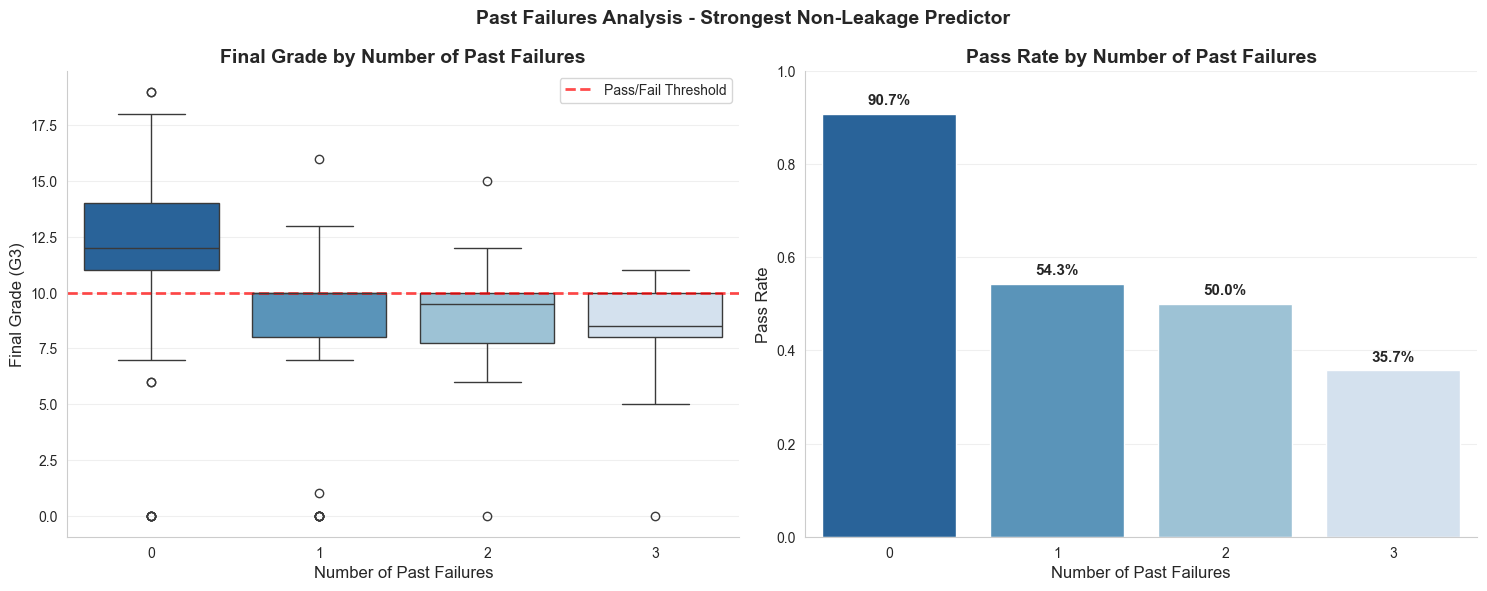

Past failures correlation with G3: -0.393
Past failures show the strongest predictive power among non-leakage variables.
Critical for both clustering behavioral patterns and classification models.

Past Failures Impact Analysis:
           mean   std  count
failures                    
0         12.51  2.83    549
1          8.64  3.44     70
2          8.81  3.21     16
3          8.07  2.79     14


In [25]:
# Visualization 4: Past failures analysis - strongest predictor
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(
    "Past Failures Analysis - Strongest Non-Leakage Predictor",
    fontsize=14,
    fontweight="bold",
)

# Failures vs G3 boxplot
sns.boxplot(x="failures", y="G3", data=df, ax=ax1, palette="Blues_r")
ax1.axhline(
    y=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold",
)
ax1.set_title("Final Grade by Number of Past Failures", fontweight="bold")
ax1.set_xlabel("Number of Past Failures")
ax1.set_ylabel("Final Grade (G3)")
ax1.legend()

# Pass rate by failures
pass_rate_failures = df.groupby("failures")["pass_fail"].mean()
sns.barplot(
    x=pass_rate_failures.index, y=pass_rate_failures.values, ax=ax2, palette="Blues_r"
)
ax2.set_title("Pass Rate by Number of Past Failures", fontweight="bold")
ax2.set_xlabel("Number of Past Failures")
ax2.set_ylabel("Pass Rate")
ax2.set_ylim(0, 1)

# Add percentage labels
for i, v in enumerate(pass_rate_failures.values):
    ax2.text(i, v + 0.02, f"{v:.1%}", ha="center", fontweight="bold")

plt.tight_layout()
plt.show()

failures_corr = df_numeric["failures"].corr(df_numeric["G3"])
print(f"Past failures correlation with G3: {failures_corr:.3f}")
print("Past failures show the strongest predictive power among non-leakage variables.")
print("Critical for both clustering behavioral patterns and classification models.")

# Critical failures impact analysis
print("\nPast Failures Impact Analysis:")
failures_stats = df.groupby("failures")["G3"].agg(["mean", "std", "count"]).round(2)

print(failures_stats)

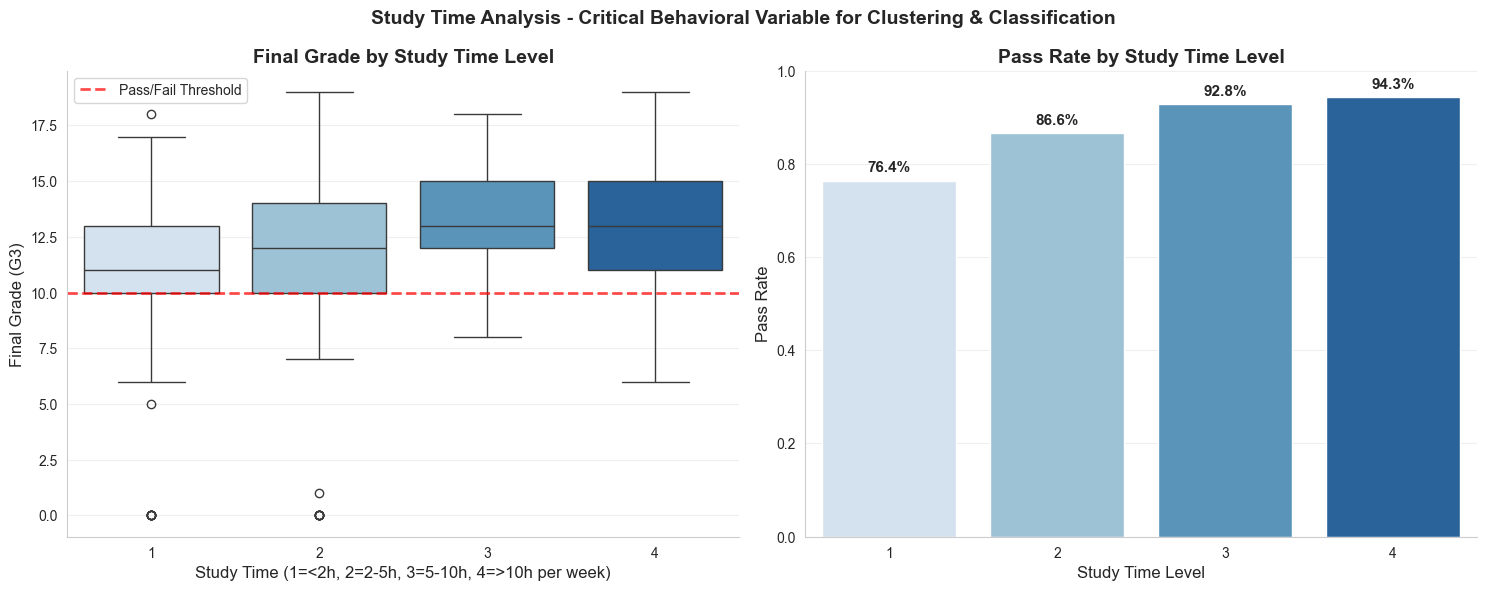

Study time correlation with G3: 0.250
Study time shows clear progressive improvement in both median grades and pass rates.
Essential variable for behavioral clustering and predictive classification.

📊 Study Time Impact:
            mean   std  count
studytime                    
1          10.84  3.22    212
2          12.09  3.24    305
3          13.23  2.50     97
4          13.06  3.04     35


In [21]:
# Visualization 5: Study time analysis - key behavioral variable
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(
    "Study Time Analysis - Critical Behavioral Variable for Clustering & Classification",
    fontsize=14,
    fontweight="bold",
)

# Study time vs G3 boxplot
sns.boxplot(x="studytime", y="G3", data=df, ax=ax1, palette="Blues")
ax1.axhline(
    y=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold",
)
ax1.set_title("Final Grade by Study Time Level", fontweight="bold")
ax1.set_xlabel("Study Time (1=<2h, 2=2-5h, 3=5-10h, 4=>10h per week)")
ax1.set_ylabel("Final Grade (G3)")
ax1.legend()

# Study time pass rate
pass_rate_study = df.groupby("studytime")["pass_fail"].mean()
sns.barplot(x=pass_rate_study.index, y=pass_rate_study.values, ax=ax2, palette="Blues")
ax2.set_title("Pass Rate by Study Time Level", fontweight="bold")
ax2.set_xlabel("Study Time Level")
ax2.set_ylabel("Pass Rate")
ax2.set_ylim(0, 1)

# Add percentage labels
for i, v in enumerate(pass_rate_study.values):
    ax2.text(i, v + 0.02, f"{v:.1%}", ha="center", fontweight="bold")

plt.tight_layout()
plt.show()

studytime_corr = df_numeric["studytime"].corr(df_numeric["G3"])
print(f"Study time correlation with G3: {studytime_corr:.3f}")
print(
    "Study time shows clear progressive improvement in both median grades and pass rates."
)
print("Essential variable for behavioral clustering and predictive classification.")

# Statistical summaries
print("\n📊 Study Time Impact:")
studytime_stats = df.groupby("studytime")["G3"].agg(["mean", "std", "count"]).round(2)

print(studytime_stats)

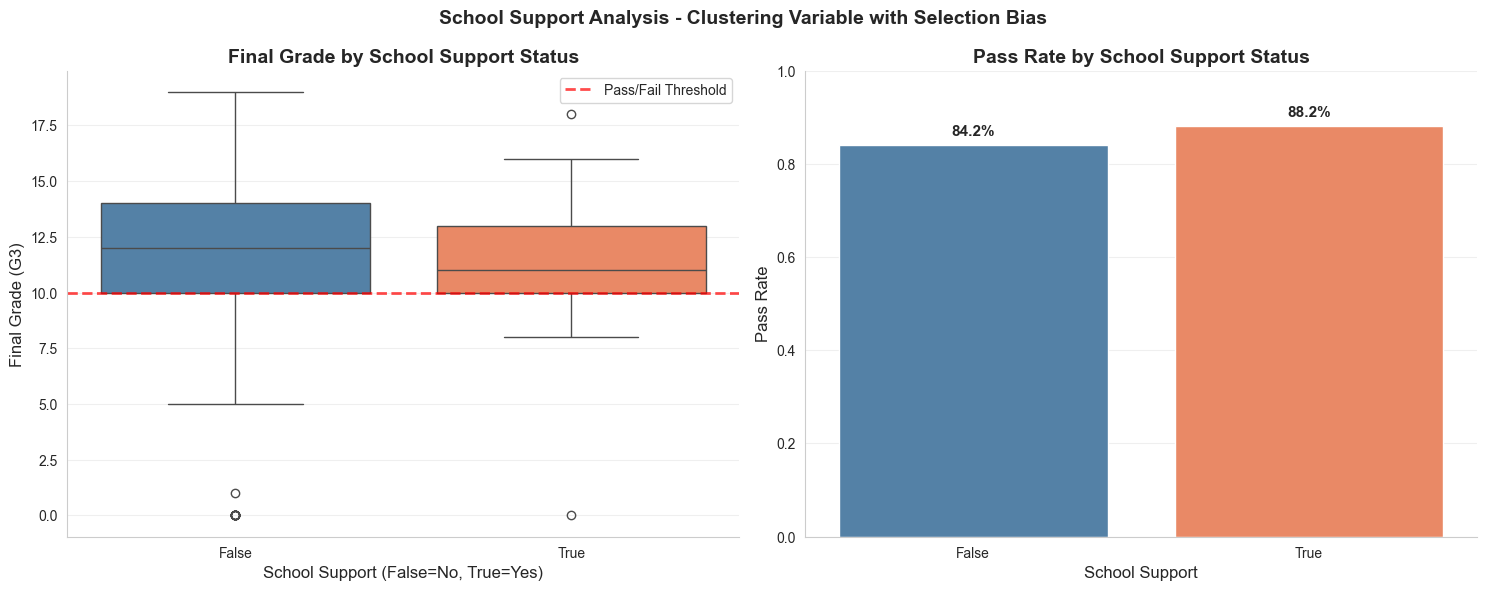

School support correlation with G3: -0.066
Counter-intuitive pattern: Students with school support show lower grades.
This indicates selection bias - support is provided to struggling students.
Important clustering variable despite negative correlation with grades.

📊 School Support Impact Analysis:
            mean  median   std  count
schoolsup                            
False      11.98    12.0  3.32    581
True       11.28    11.0  2.30     68


In [30]:
# School Support Analysis - Key Behavioral Variable for Clustering
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(
    "School Support Analysis - Clustering Variable with Selection Bias",
    fontsize=14,
    fontweight="bold",
)

# School support vs G3 boxplot
sns.boxplot(x="schoolsup", y="G3", data=df, ax=ax1, palette=["steelblue", "coral"])
ax1.axhline(
    y=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold",
)
ax1.set_title("Final Grade by School Support Status", fontweight="bold")
ax1.set_xlabel("School Support (False=No, True=Yes)")
ax1.set_ylabel("Final Grade (G3)")
ax1.legend()

# School support pass rate
pass_rate_schoolsup = df.groupby("schoolsup")["pass_fail"].mean()
sns.barplot(
    x=[str(x) for x in pass_rate_schoolsup.index],
    y=pass_rate_schoolsup.values,
    ax=ax2,
    palette=["steelblue", "coral"],
)
ax2.set_title("Pass Rate by School Support Status", fontweight="bold")
ax2.set_xlabel("School Support")
ax2.set_ylabel("Pass Rate")
ax2.set_ylim(0, 1)

# Add percentage labels
for i, v in enumerate(pass_rate_schoolsup.values):
    ax2.text(i, v + 0.02, f"{v:.1%}", ha="center", fontweight="bold")

plt.tight_layout()
plt.show()

schoolsup_corr = df_numeric["schoolsup"].corr(df_numeric["G3"])
print(f"School support correlation with G3: {schoolsup_corr:.3f}")
print("Counter-intuitive pattern: Students with school support show lower grades.")
print("This indicates selection bias - support is provided to struggling students.")
print("Important clustering variable despite negative correlation with grades.")

# Statistical summary
print("\n📊 School Support Impact Analysis:")
schoolsup_stats = (
    df.groupby("schoolsup")["G3"].agg(["mean", "median", "std", "count"]).round(2)
)

print(schoolsup_stats)

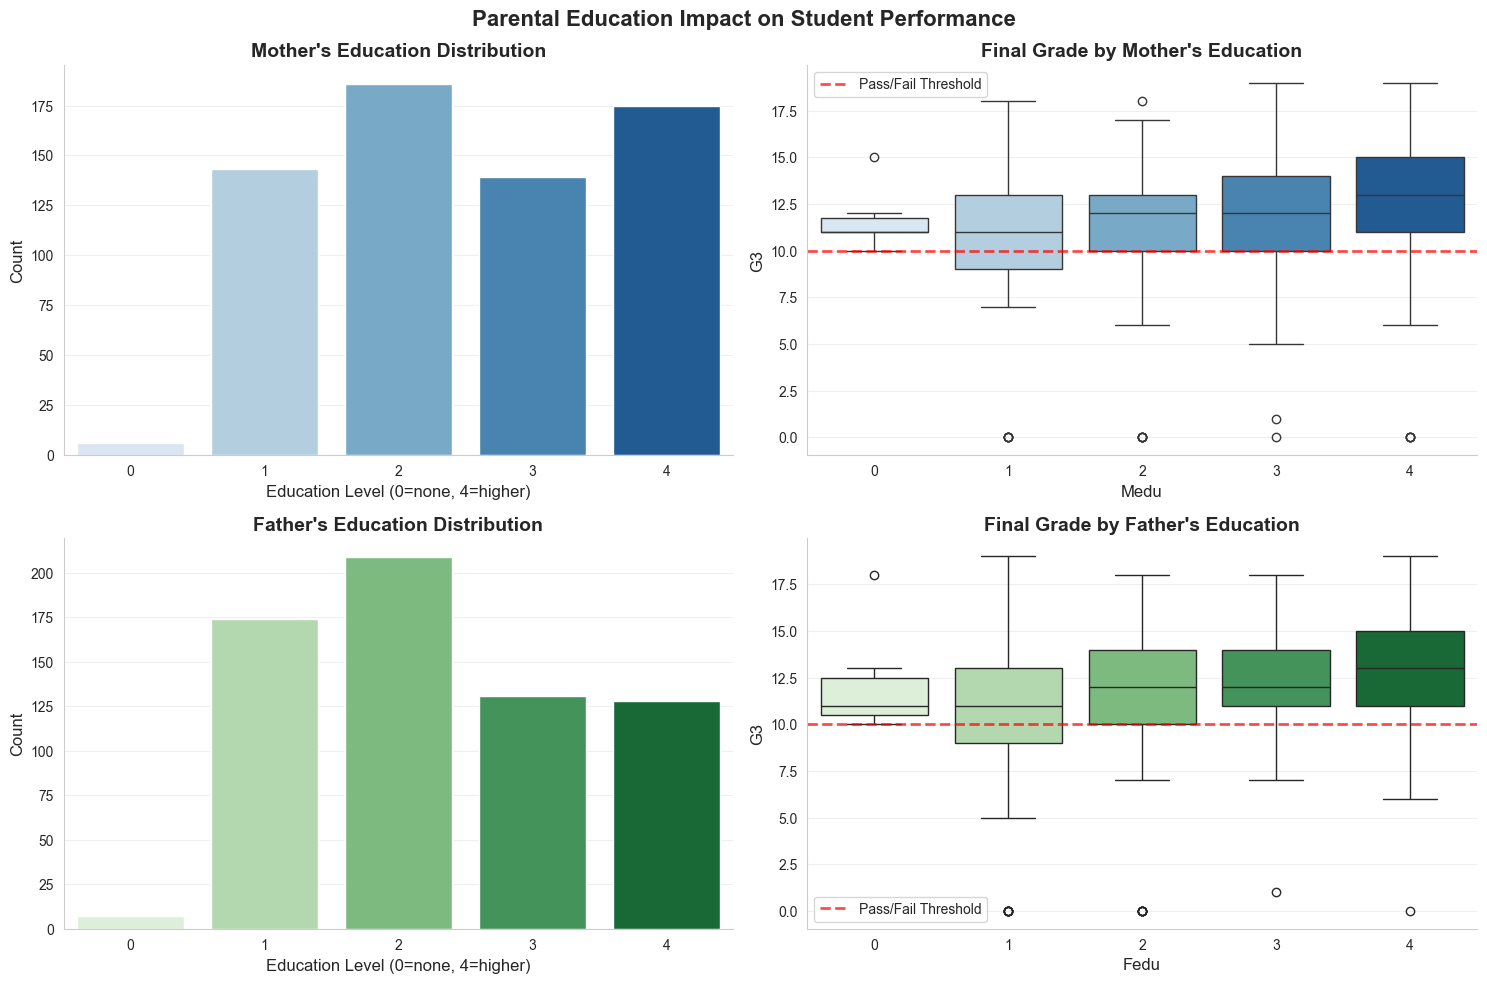

📊 Mother's Education Impact:
       mean   std  count  pass_rate
Medu                               
0     11.67  1.75      6      100.0
1     10.80  3.16    143       74.1
2     11.66  3.06    186       85.5
3     11.92  3.12    139       84.2
4     13.07  3.24    175       92.0

📊 Father's Education Impact:
       mean   std  count  pass_rate
Fedu                               
0     12.14  2.79      7      100.0
1     10.94  3.42    174       74.1
2     11.78  3.45    209       85.2
3     12.38  2.49    131       92.4
4     12.92  2.92    128       89.1


In [38]:
# Parental Education Analysis (Medu, Fedu)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(
    "Parental Education Impact on Student Performance", fontsize=16, fontweight="bold"
)

# Mother's education distribution
medu_counts = df["Medu"].value_counts().sort_index()
sns.barplot(x=medu_counts.index, y=medu_counts.values, palette="Blues", ax=axes[0, 0])
axes[0, 0].set_title("Mother's Education Distribution", fontweight="bold")
axes[0, 0].set_xlabel("Education Level (0=none, 4=higher)")
axes[0, 0].set_ylabel("Count")

# Mother's education vs G3
sns.boxplot(x="Medu", y="G3", data=df, ax=axes[0, 1], palette="Blues")
axes[0, 1].axhline(
    y=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold",
)
axes[0, 1].set_title("Final Grade by Mother's Education", fontweight="bold")
axes[0, 1].legend()

# Father's education distribution
fedu_counts = df["Fedu"].value_counts().sort_index()
sns.barplot(x=fedu_counts.index, y=fedu_counts.values, palette="Greens", ax=axes[1, 0])
axes[1, 0].set_title("Father's Education Distribution", fontweight="bold")
axes[1, 0].set_xlabel("Education Level (0=none, 4=higher)")
axes[1, 0].set_ylabel("Count")

# Father's education vs G3
sns.boxplot(x="Fedu", y="G3", data=df, ax=axes[1, 1], palette="Greens")
axes[1, 1].axhline(
    y=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold",
)
axes[1, 1].set_title("Final Grade by Father's Education", fontweight="bold")
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Statistical summaries
print("📊 Mother's Education Impact:")
medu_stats = df.groupby("Medu")["G3"].agg(["mean", "std", "count"]).round(2)
medu_stats["pass_rate"] = (df.groupby("Medu")["pass_fail"].mean() * 100).round(1)
print(medu_stats)

print("\n📊 Father's Education Impact:")
fedu_stats = df.groupby("Fedu")["G3"].agg(["mean", "std", "count"]).round(2)
fedu_stats["pass_rate"] = (df.groupby("Fedu")["pass_fail"].mean() * 100).round(1)
print(fedu_stats)

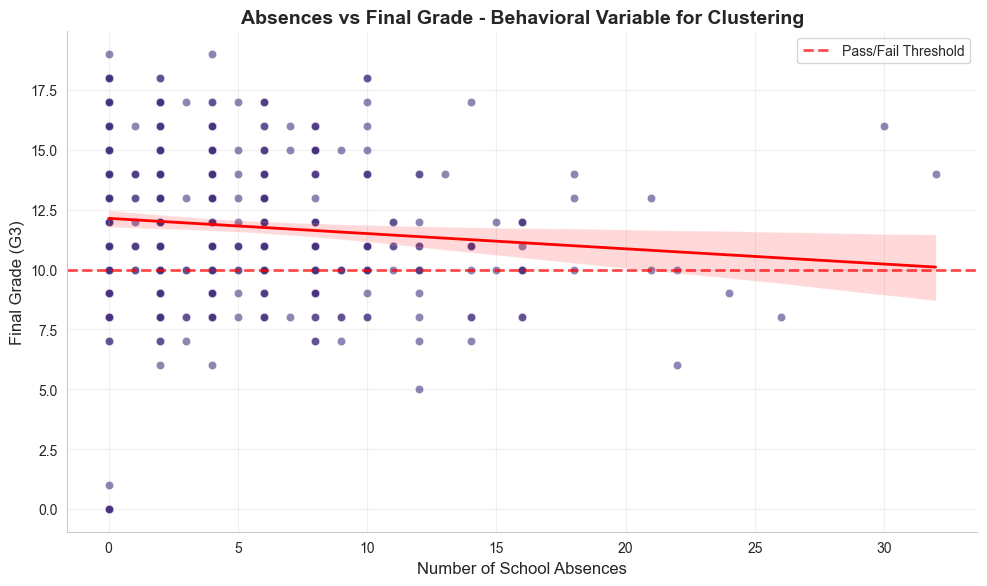

Absences correlation with G3: -0.091
Despite weak correlation, absences represent important behavioral patterns for clustering.
High absence students may form distinct behavioral clusters regardless of grade correlation.


In [14]:
# Visualization 6: Absences analysis - key behavioral variable despite weak correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="absences", y="G3", alpha=0.6)
sns.regplot(
    data=df,
    x="absences",
    y="G3",
    scatter=False,
    color="red",
    line_kws={"linestyle": "-", "linewidth": 2},
)
plt.axhline(
    y=10,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Pass/Fail Threshold",
)
plt.title(
    "Absences vs Final Grade - Behavioral Variable for Clustering",
    fontsize=14,
    fontweight="bold",
)
plt.xlabel("Number of School Absences")
plt.ylabel("Final Grade (G3)")
plt.legend()
plt.tight_layout()
plt.show()

absences_corr = df_numeric["absences"].corr(df_numeric["G3"])
print(f"Absences correlation with G3: {absences_corr:.3f}")
print(
    "Despite weak correlation, absences represent important behavioral patterns for clustering."
)
print(
    "High absence students may form distinct behavioral clusters regardless of grade correlation."
)

---
## Behavioral Variables for Clustering

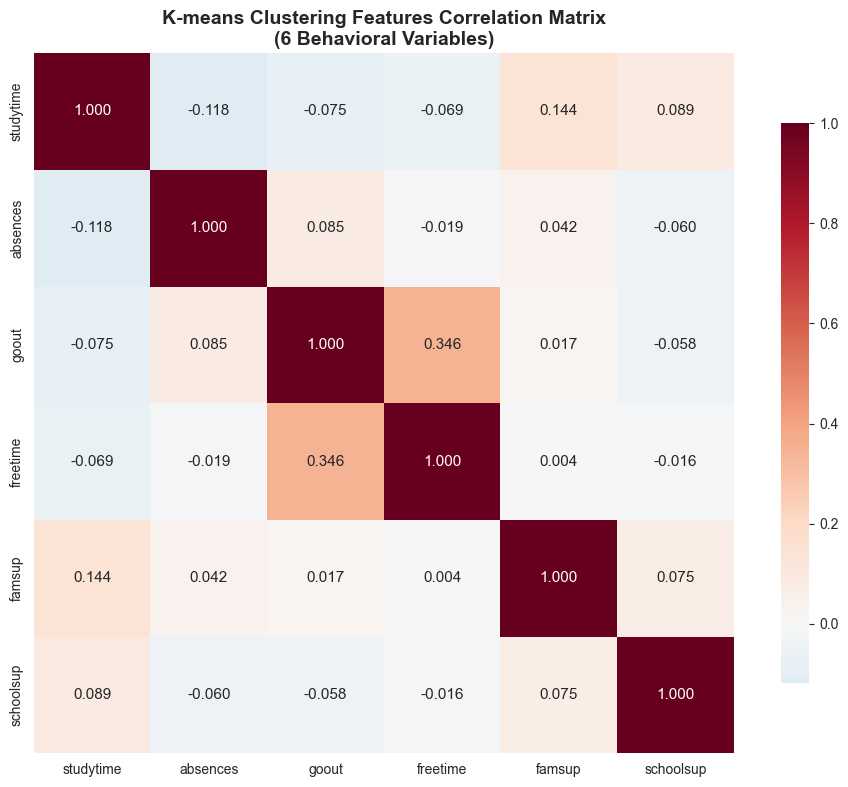

K-MEANS CLUSTERING FEATURE ANALYSIS:
Selected behavioral variables for clustering:
  - studytime: correlation with G3 = 0.250
  - absences: correlation with G3 = -0.091
  - goout: correlation with G3 = -0.088
  - freetime: correlation with G3 = -0.123
  - famsup: correlation with G3 = 0.059
  - schoolsup: correlation with G3 = -0.066

These 6 variables will be used to identify behavioral patterns in student populations.
Low inter-correlations suggest they capture different aspects of student behavior.


In [15]:
# Visualization 7: Clustering feature correlation heatmap
clustering_features = [
    "studytime",
    "absences",
    "goout",
    "freetime",
    "famsup",
    "schoolsup",
]

plt.figure(figsize=(10, 8))
correlation_matrix = df_numeric[clustering_features].corr()
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="RdBu_r",
    center=0,
    square=True,
    fmt=".3f",
    cbar_kws={"shrink": 0.8},
)
plt.title(
    "K-means Clustering Features Correlation Matrix\n(6 Behavioral Variables)",
    fontsize=14,
    fontweight="bold",
)
plt.tight_layout()
plt.show()

print("K-MEANS CLUSTERING FEATURE ANALYSIS:")
print("Selected behavioral variables for clustering:")
for feature in clustering_features:
    g3_corr = df_numeric[feature].corr(df_numeric["G3"])
    print(f"  - {feature}: correlation with G3 = {g3_corr:.3f}")

print(
    "\nThese 6 variables will be used to identify behavioral patterns in student populations."
)
print(
    "Low inter-correlations suggest they capture different aspects of student behavior."
)

---
## Hypothesis Testing

Statistical validation of key relationships through formal hypothesis testing.

In [16]:
# Hypothesis 1: Study time affects final grades
print("\nHYPOTHESIS 1: Study Time and Academic Performance")
print("-" * 50)
print("H0: There is no significant difference in G3 scores across study time levels")
print("H1: There is a significant difference in G3 scores across study time levels")

# ANOVA test
study_groups = [df[df["studytime"] == i]["G3"] for i in range(1, 5)]
f_stat, p_value = stats.f_oneway(*study_groups)
print(f"ANOVA F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Result: {'Reject H0' if p_value < 0.05 else 'Fail to reject H0'} at α=0.05")


HYPOTHESIS 1: Study Time and Academic Performance
--------------------------------------------------
H0: There is no significant difference in G3 scores across study time levels
H1: There is a significant difference in G3 scores across study time levels
ANOVA F-statistic: 15.8763
P-value: 0.000000
Result: Reject H0 at α=0.05


In [17]:
# Hypothesis 2: Past failures affect pass rates
print("\nHYPOTHESIS 2: Past Failures and Pass Rates")
print("-" * 50)
print("H0: Past failures and pass rates are independent")
print("H1: Past failures and pass rates are dependent")

# Chi-square test
crosstab = pd.crosstab(df["failures"], df["pass_fail"])
chi2, p_value, dof, expected = chi2_contingency(crosstab)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Degrees of freedom: {dof}")
print(f"Result: {'Reject H0' if p_value < 0.05 else 'Fail to reject H0'} at α=0.05")


HYPOTHESIS 2: Past Failures and Pass Rates
--------------------------------------------------
H0: Past failures and pass rates are independent
H1: Past failures and pass rates are dependent
Chi-square statistic: 105.4435
P-value: 0.000000
Degrees of freedom: 3
Result: Reject H0 at α=0.05


In [18]:
# Hypothesis 3: Absences correlation with G3
print("\nHYPOTHESIS 3: Absences and Final Grades Correlation")
print("-" * 50)
print("H0: There is no significant correlation between absences and G3")
print("H1: There is a significant correlation between absences and G3")

corr_coef, p_value = stats.pearsonr(df["absences"], df["G3"])
print(f"Pearson correlation coefficient: {corr_coef:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Result: {'Reject H0' if p_value < 0.05 else 'Fail to reject H0'} at α=0.05")


HYPOTHESIS 3: Absences and Final Grades Correlation
--------------------------------------------------
H0: There is no significant correlation between absences and G3
H1: There is a significant correlation between absences and G3
Pearson correlation coefficient: -0.0914
P-value: 0.019896
Result: Reject H0 at α=0.05


In [19]:
# Hypothesis 4: School support affects grade distribution
print("\nHYPOTHESIS 4: School Support and Grade Distribution")
print("-" * 50)
print("H0: School support recipients and non-recipients have same G3 distribution")
print(
    "H1: School support recipients and non-recipients have different G3 distributions"
)

support_group = df[df["schoolsup"] == True]["G3"]
no_support_group = df[df["schoolsup"] == False]["G3"]
u_stat, p_value = stats.mannwhitneyu(
    support_group, no_support_group, alternative="two-sided"
)
print(f"Mann-Whitney U statistic: {u_stat:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Result: {'Reject H0' if p_value < 0.05 else 'Fail to reject H0'} at α=0.05")


HYPOTHESIS 4: School Support and Grade Distribution
--------------------------------------------------
H0: School support recipients and non-recipients have same G3 distribution
H1: School support recipients and non-recipients have different G3 distributions
Mann-Whitney U statistic: 16520.0000
P-value: 0.026106
Result: Reject H0 at α=0.05


In [20]:
# Statistical Conclusions Summary
print("\n" + "=" * 60)
print("STATISTICAL CONCLUSIONS:")
print("=" * 60)
print("1. Study time significantly impacts academic performance")
print("2. Past failures strongly predict future failure risk")
print("3. Absences show weak but significant negative correlation with grades")
print("4. School support targeting creates selection bias in data")
print("\nAll hypotheses provide statistical validation for the modeling approach.")


STATISTICAL CONCLUSIONS:
1. Study time significantly impacts academic performance
2. Past failures strongly predict future failure risk
3. Absences show weak but significant negative correlation with grades
4. School support targeting creates selection bias in data

All hypotheses provide statistical validation for the modeling approach.


---
## Final Modeling Roadmap

### K-means Clustering Approach:
- **Features**: studytime, absences, goout, freetime, famsup, schoolsup
- **Goal**: Identify behavioral student segments
- **Expected clusters**: High achievers, at-risk, average performers, social-focused

### Binary Classification Approach:
- **Target**: pass_fail (G3 >= 10)
- **Key features**: failures (strongest), studytime, absences, behavioral variables
- **Excluded**: G1, G2 (data leakage)
- **Challenge**: Class imbalance requires balanced sampling or weighted algorithms

### Statistical Validation:
- Correlation analysis confirms feature independence for clustering
- Past failures emerge as the strongest non-leakage predictor
- Behavioral variables capture different student lifestyle aspects
- Model interpretability supports educational intervention strategies